In [1]:
!pip install dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 6.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 55.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 85.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 1.7 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: dacite
    Found existing installation: dacite 1.9.2
    Uninstalling

In [2]:
import dagshub
dagshub.init(repo_owner='AleksandreBakhtadze', repo_name='ML-abakh22-assignment-2-IEEE-CIS-Fraud-Detection', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=c52773cf-8ce1-4dc1-81d5-4b30241a070c&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=087c95e6fef924c3c7ecf44e4f1d9d074374ff54b2743baf60981811a028071e




Output()

Accessing as AleksandreBakhtadze

Initialized MLflow to track repo "AleksandreBakhtadze/ML-abakh22-assignment-2-IEEE-CIS-Fraud-Detection"

Repository AleksandreBakhtadze/ML-abakh22-assignment-2-IEEE-CIS-Fraud-Detection initialized!

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [4]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

# Read the data

In [5]:
train_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
test_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')
test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')

# Merge data by TransactionID

In [6]:
train_df = train_transaction.merge(train_identity, on='TransactionID', how='left')

In [7]:
test_df = test_transaction.merge(test_identity, on='TransactionID', how='left')

In [8]:
test_df.columns = test_df.columns.str.replace(r'^id-(\d+)', r'id_\1', regex=True)

In [9]:
print("Test DataFrame columns:", test_df.columns)
print("Training DataFrame columns:", train_df.columns)

Test DataFrame columns: Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=433)
Training DataFrame columns: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)


# To see how imbalance is the data

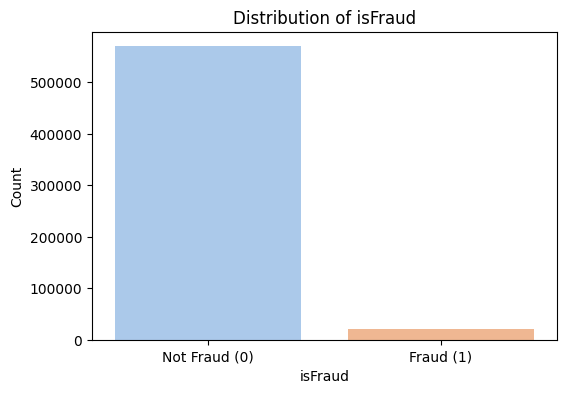

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

# 1. Count the values of isFraud
fraud_counts = train_df['isFraud'].value_counts()

# 2. Create the plot
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='pastel')

plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.ylabel('Count')
plt.title('Distribution of isFraud')

# 3. Save the plot
fraud_dist_plot_path = "/kaggle/working/isfraud_distribution.png"
plt.savefig(fraud_dist_plot_path)
plt.show()

# # 4. Log to MLflow
# with mlflow.start_run(run_name="isfraud_distribution_plot"):
#     mlflow.log_artifact(fraud_dist_plot_path, artifact_path="plots")


# Label Encoding 

In [11]:
# from sklearn.preprocessing import LabelEncoder

# # Loop through each column and apply LabelEncoder if it's of object type
# for col in train_df.columns:
#     if train_df[col].dtype == 'object':
#         le = LabelEncoder()
#         # Fill NaN with a placeholder string to avoid errors
#         train_df[col] = train_df[col].fillna('unknown')
#         train_df[col] = le.fit_transform(train_df[col])

In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Label encode train_df and store encoders
label_encoders = {}

for col in train_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train_df[col] = train_df[col].fillna('unknown')
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

# Step 2: Apply label encoders to test_df
for col, le in label_encoders.items():
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna('unknown')

        # Ensure all values are strings for comparison
        test_df[col] = test_df[col].astype(str)

        # Add 'unknown' to classes_ if not already there
        if 'unknown' not in le.classes_:
            le.classes_ = np.append(le.classes_, 'unknown')

        # Replace unseen labels with 'unknown'
        test_df[col] = test_df[col].apply(lambda x: x if x in le.classes_ else 'unknown')
        test_df[col] = le.transform(test_df[col])


In [13]:
print("Test DataFrame columns:", test_df.columns)
print("Training DataFrame columns:", train_df.columns)

Test DataFrame columns: Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=433)
Training DataFrame columns: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)


# Missingness and Imputation. Impute all with 999. Do more complex imputation afterwards. 

In [14]:
threshold = 0.99
missing_ratio = train_df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index


In [15]:
print("Columns to drop:", cols_to_drop)

Columns to drop: Index(['id_07', 'id_08', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26'], dtype='object')


In [16]:
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)


In [17]:
train_df.fillna(999, inplace=True)
test_df.fillna(999, inplace=True)

In [18]:
print("Test DataFrame columns:", test_df.columns)
print("Training DataFrame columns:", train_df.columns)

Test DataFrame columns: Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=426)
Training DataFrame columns: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=427)


# TransactionDT - Timedelta from a given reference DateTime 
# The 'hour' turns out to be a highly important feature in prediction.

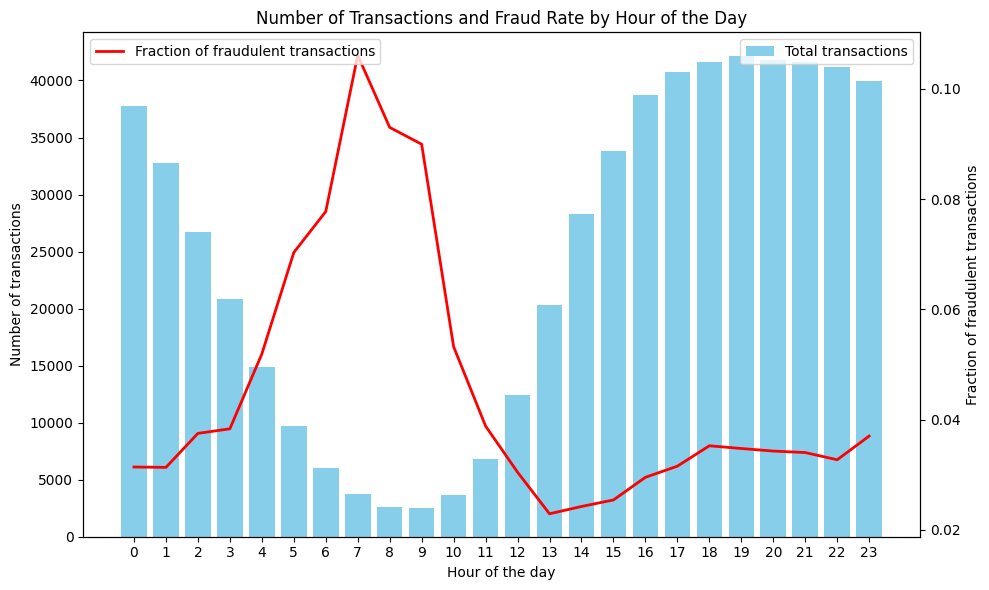

In [19]:
import matplotlib.pyplot as plt
import mlflow

# 1. Create the feature
train_df['Transaction_hour'] = (train_df['TransactionDT'] // 3600) % 24

# 2. Group data
total_per_hour = train_df.groupby('Transaction_hour').size()
fraud_per_hour = train_df[train_df['isFraud'] == 1].groupby('Transaction_hour').size()

# 3. Calculate fraud fraction
fraud_fraction = fraud_per_hour / total_per_hour

# 4. Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(total_per_hour.index, total_per_hour.values, color='skyblue', label='Total transactions')
ax1.set_ylabel('Number of transactions')
ax1.set_xlabel('Hour of the day')
ax1.set_xticks(range(0, 24))
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.plot(fraud_fraction.index, fraud_fraction.values, color='red', linewidth=2, label='Fraction of fraudulent transactions')
ax2.set_ylabel('Fraction of fraudulent transactions')
ax2.legend(loc='upper left')

plt.title('Number of Transactions and Fraud Rate by Hour of the Day')
plt.tight_layout()

# Save plot
fraud_time_plot_path = "/kaggle/working/transactions_fraud_by_hour.png"
plt.savefig(fraud_time_plot_path)
plt.show()

# # 5. Log to MLflow
# with mlflow.start_run(run_name="transactions_fraud_by_hour"):
#     mlflow.log_artifact(fraud_time_plot_path, artifact_path="plots")


In [20]:
def get_warning_signal(hour):
    if 7 < hour < 10:
        return 'high'
    elif 14 < hour < 16:
        return 'lowest'
    elif (4 < hour < 7) or (10 < hour < 14):
        return 'medium'
    else:
        return 'low'

for df in [train_df, test_df]:
    if 'Transaction_hour' not in df.columns:
        df['Transaction_hour'] = (df['TransactionDT'] // 3600) % 24
    df['hour_warning_signal'] = df['Transaction_hour'].apply(get_warning_signal)


In [21]:
print("Test DataFrame columns:", test_df.columns)
print("Training DataFrame columns:", train_df.columns)

Test DataFrame columns: Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo', 'Transaction_hour', 'hour_warning_signal'],
      dtype='object', length=428)
Training DataFrame columns: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo', 'Transaction_hour', 'hour_warning_signal'],
      dtype='object', length=429)


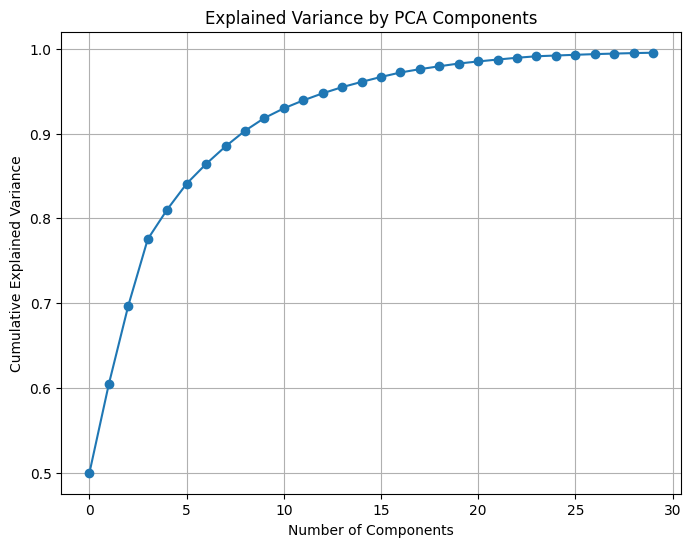

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import mlflow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Select V columns
v_cols = [f'V{i}' for i in range(1, 340)]
v_data = train_df[v_cols].copy()
v_test_data = test_df[v_cols].copy()

# 3. Scale the data
scaler = StandardScaler()
v_scaled = scaler.fit_transform(v_data)
v_test_scaled = scaler.transform(v_test_data)

# 4. Apply PCA
n_components = 30
pca = PCA(n_components=n_components)
v_pca = pca.fit_transform(v_scaled)
v_test_pca = pca.transform(v_test_scaled)

# 5. Create a DataFrame for PCA features
v_pca_df = pd.DataFrame(v_pca, columns=[f'V_PCA_{i+1}' for i in range(n_components)])
v_test_pca_df = pd.DataFrame(v_test_pca, columns=[f'V_PCA_{i+1}' for i in range(n_components)])

# 6. Drop original V columns and concatenate PCA components
train_df = train_df.drop(columns=v_cols)
test_df = test_df.drop(columns=v_cols)

train_df = pd.concat([train_df.reset_index(drop=True), v_pca_df.reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df.reset_index(drop=True), v_test_pca_df.reset_index(drop=True)], axis=1)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()

# Save plot
pca_plot_path = "/kaggle/working/pca_explained_variance.png"
plt.savefig(pca_plot_path)
plt.show()

# # Log the plot to MLflow
# with mlflow.start_run(run_name="pca_explained_variance"):
#     mlflow.log_artifact(pca_plot_path, artifact_path="plots")


In [23]:
print("Test DataFrame columns:", test_df.columns)
print("Training DataFrame columns:", train_df.columns)

Test DataFrame columns: Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V_PCA_21', 'V_PCA_22', 'V_PCA_23', 'V_PCA_24', 'V_PCA_25', 'V_PCA_26',
       'V_PCA_27', 'V_PCA_28', 'V_PCA_29', 'V_PCA_30'],
      dtype='object', length=119)
Training DataFrame columns: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V_PCA_21', 'V_PCA_22', 'V_PCA_23', 'V_PCA_24', 'V_PCA_25', 'V_PCA_26',
       'V_PCA_27', 'V_PCA_28', 'V_PCA_29', 'V_PCA_30'],
      dtype='object', length=120)


In [24]:

# List object (categorical) columns in test_df
print("Object columns in test_df:")
print(test_df.select_dtypes(include='object').columns.tolist())

# List object (categorical) columns in train_df
print("\nObject columns in X_low:")
print(train_df.select_dtypes(include='object').columns.tolist())


Object columns in test_df:
['hour_warning_signal']

Object columns in X_low:
['hour_warning_signal']


# Splitting data Cost-Based

Low-cost transactions: 84668
Medium-cost transactions: 413017
High-cost transactions: 92855


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


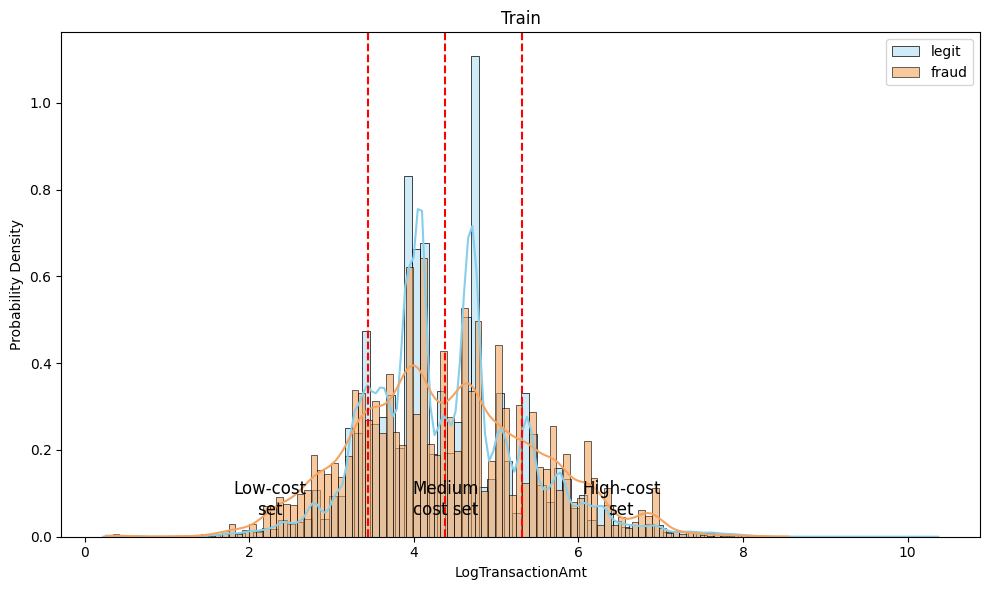

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

# Step 1: Log transform
train_df['log_TransactionAmt'] = np.log1p(train_df['TransactionAmt'])

# Step 2: Compute stats
mean_log_amt = train_df['log_TransactionAmt'].mean()
std_log_amt = train_df['log_TransactionAmt'].std()

# Step 3: Define thresholds
low_thresh = np.expm1(mean_log_amt - std_log_amt)
high_thresh = np.expm1(mean_log_amt + std_log_amt)

# Step 4: Create subsets
low_cost_df = train_df[train_df['TransactionAmt'] < low_thresh]
medium_cost_df = train_df[(train_df['TransactionAmt'] >= low_thresh) & 
                          (train_df['TransactionAmt'] <= high_thresh)]
high_cost_df = train_df[train_df['TransactionAmt'] > high_thresh]

# Optional: Print counts
print(f"Low-cost transactions: {len(low_cost_df)}")
print(f"Medium-cost transactions: {len(medium_cost_df)}")
print(f"High-cost transactions: {len(high_cost_df)}")

# Step 5: Plotting
plt.figure(figsize=(10, 6))
sns.histplot(train_df[train_df['isFraud'] == 0]['log_TransactionAmt'], 
             kde=True, stat="density", bins=100, label='legit', color='skyblue', alpha=0.4)
sns.histplot(train_df[train_df['isFraud'] == 1]['log_TransactionAmt'], 
             kde=True, stat="density", bins=100, label='fraud', color='sandybrown', alpha=0.6)

# Vertical lines for thresholds (in log scale)
low_log_thresh = np.log1p(low_thresh)
high_log_thresh = np.log1p(high_thresh)
mean_log_amt = train_df['log_TransactionAmt'].mean()
plt.axvline(x=low_log_thresh, color='red', linestyle='--')
plt.axvline(x=mean_log_amt, color='red', linestyle='--')
plt.axvline(x=high_log_thresh, color='red', linestyle='--')

# Annotate cost sets
plt.text(low_log_thresh - 1.2, 0.05, 'Low-cost\nset', fontsize=12, ha='center')
plt.text(mean_log_amt, 0.05, 'Medium\ncost set', fontsize=12, ha='center')
plt.text(high_log_thresh + 1.2, 0.05, 'High-cost\nset', fontsize=12, ha='center')

plt.title('Train')
plt.xlabel('LogTransactionAmt')
plt.ylabel('Probability Density')
plt.legend()
plt.tight_layout()

# Save plot locally
plot_path = "/kaggle/working/log_transaction_plot.png"
plt.savefig(plot_path)  # <-- Save the figure

plt.show()

# # Step 6: Log the plot to MLflow
# with mlflow.start_run(run_name="log_transaction_distribution"):
#     mlflow.log_artifact(plot_path, artifact_path="plots")


In [26]:
print("Test DataFrame columns:", test_df.columns)
print("Training DataFrame columns:", train_df.columns)

Test DataFrame columns: Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V_PCA_21', 'V_PCA_22', 'V_PCA_23', 'V_PCA_24', 'V_PCA_25', 'V_PCA_26',
       'V_PCA_27', 'V_PCA_28', 'V_PCA_29', 'V_PCA_30'],
      dtype='object', length=119)
Training DataFrame columns: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V_PCA_22', 'V_PCA_23', 'V_PCA_24', 'V_PCA_25', 'V_PCA_26', 'V_PCA_27',
       'V_PCA_28', 'V_PCA_29', 'V_PCA_30', 'log_TransactionAmt'],
      dtype='object', length=121)


# Spillint datas into train test

In [27]:
from sklearn.model_selection import train_test_split

# Example for high-cost set
X_high = high_cost_df.drop(['isFraud', 'log_TransactionAmt'], axis=1)
y_high = high_cost_df['isFraud']

X_high_train, X_high_val, y_high_train, y_high_val = train_test_split(
    X_high, y_high, test_size=0.3, random_state=42, stratify=y_high
)


In [28]:
# Example for high-cost set
X_medium = medium_cost_df.drop(['isFraud', 'log_TransactionAmt'], axis=1)
y_medium = medium_cost_df['isFraud']

X_medium_train, X_medium_val, y_medium_train, y_medium_val = train_test_split(
    X_medium, y_medium, test_size=0.3, random_state=42, stratify=y_medium
)

In [29]:
# Example for high-cost set
X_low = low_cost_df.drop(['isFraud', 'log_TransactionAmt'], axis=1)
y_low = low_cost_df['isFraud']

X_low_train, X_low_val, y_low_train, y_low_val = train_test_split(
    X_low, y_low, test_size=0.3, random_state=42, stratify=y_low
)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
import pandas as pd

# Function to calculate scale_pos_weight
def calculate_scale_pos_weight(y):
    n_non_fraud = (y == 0).sum()
    n_fraud = (y == 1).sum()
    return n_non_fraud / n_fraud if n_fraud > 0 else 1

# Calculate scale_pos_weight for each subset
ratio_low = calculate_scale_pos_weight(y_low)
ratio_medium = calculate_scale_pos_weight(y_medium)
ratio_high = calculate_scale_pos_weight(y_high)

# Identify columns in any subset (they should all have the same schema)
sample_X = X_low  # or X_medium or X_high
categorical_cols = sample_X.select_dtypes(include='object').columns.tolist()
numeric_cols = sample_X.select_dtypes(exclude='object').columns.tolist()

# Preprocessor that applies scaling to numeric and one-hot encoding to categoricals
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Function to create a pipeline for a given scale_pos_weight ratio
def create_pipeline(ratio):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('xgb', XGBClassifier(
            objective='binary:logistic',
            eval_metric='auc',
            use_label_encoder=False,
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            random_state=42,
            scale_pos_weight=ratio
        ))
    ])

# Create pipelines
pipeline_low = create_pipeline(ratio_low)
pipeline_medium = create_pipeline(ratio_medium)
pipeline_high = create_pipeline(ratio_high)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluation function
def evaluate_pipeline(pipeline, X, y, subset_name):
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
    print(f"{subset_name} - Mean ROC AUC: {scores.mean():.4f}, Std: {scores.std():.4f}")

# Run evaluations
evaluate_pipeline(pipeline_low, X_low, y_low, "Low-cost set")
evaluate_pipeline(pipeline_medium, X_medium, y_medium, "Medium-cost set")
evaluate_pipeline(pipeline_high, X_high, y_high, "High-cost set")


Low-cost set - Mean ROC AUC: 0.9535, Std: 0.0032
Medium-cost set - Mean ROC AUC: 0.9162, Std: 0.0051
High-cost set - Mean ROC AUC: 0.9065, Std: 0.0066


In [31]:
import mlflow
import mlflow.sklearn  # for sklearn pipelines
import matplotlib.pyplot as plt
import seaborn as sns

# Start an MLflow run
with mlflow.start_run(run_name="best_low_cost_pipeline"):

    # 1. Log parameters manually
    mlflow.log_param('model_type', 'XGBClassifier')
    mlflow.log_param('n_estimators', 100)
    mlflow.log_param('max_depth', 5)
    mlflow.log_param('learning_rate', 0.1)
    mlflow.log_param('scale_pos_weight', ratio_low)
    
    # 2. Train the pipeline
    pipeline_low.fit(X_low, y_low)

    # 3. Log the pipeline model
    mlflow.sklearn.log_model(pipeline_low, "model_pipeline_low")
    
    # 4. Evaluate and log metrics
    scores = cross_val_score(pipeline_low, X_low, y_low, cv=cv, scoring='roc_auc')
    mlflow.log_metric('cv_mean_roc_auc', scores.mean())
    mlflow.log_metric('cv_std_roc_auc', scores.std())

    # 5. Now plot and log figures ----------------------------------------

    # (a) isFraud distribution plot
    plt.figure(figsize=(6, 4))
    fraud_counts = train_df['isFraud'].value_counts()
    sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='pastel')
    plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
    plt.ylabel('Count')
    plt.title('Distribution of isFraud')
    
    fraud_plot_path = "/kaggle/working/isfraud_distribution.png"
    plt.savefig(fraud_plot_path)
    plt.close()
    mlflow.log_artifact(fraud_plot_path, artifact_path="eda_plots")

    # (b) Transaction Amount log distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[train_df['isFraud'] == 0]['log_TransactionAmt'], kde=True, stat="density", bins=100, label='legit', color='skyblue', alpha=0.4)
    sns.histplot(train_df[train_df['isFraud'] == 1]['log_TransactionAmt'], kde=True, stat="density", bins=100, label='fraud', color='sandybrown', alpha=0.6)
    
    plt.axvline(x=low_log_thresh, color='red', linestyle='--')
    plt.axvline(x=mean_log_amt, color='red', linestyle='--')
    plt.axvline(x=high_log_thresh, color='red', linestyle='--')
    
    plt.text(low_log_thresh - 1.2, 0.05, 'Low-cost\nset', fontsize=12, ha='center')
    plt.text(mean_log_amt, 0.05, 'Medium\ncost set', fontsize=12, ha='center')
    plt.text(high_log_thresh + 1.2, 0.05, 'High-cost\nset', fontsize=12, ha='center')
    
    plt.title('Train')
    plt.xlabel('LogTransactionAmt')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.tight_layout()
    
    transaction_plot_path = "/kaggle/working/transaction_amount_distribution.png"
    plt.savefig(transaction_plot_path)
    plt.close()
    mlflow.log_artifact(transaction_plot_path, artifact_path="eda_plots")

    # (c) PCA explained variance plot
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid()
    plt.title('Explained Variance by PCA Components')
    
    pca_plot_path = "/kaggle/working/pca_explained_variance.png"
    plt.savefig(pca_plot_path)
    plt.close()
    mlflow.log_artifact(pca_plot_path, artifact_path="eda_plots")

    # (d) Transaction counts and fraud rate by hour of the day
    fig, ax1 = plt.subplots(figsize=(10, 6))
    total_per_hour = train_df.groupby('Transaction_hour').size()
    fraud_per_hour = train_df[train_df['isFraud'] == 1].groupby('Transaction_hour').size()
    fraud_fraction = fraud_per_hour / total_per_hour

    ax1.bar(total_per_hour.index, total_per_hour.values, color='skyblue', label='Total transactions')
    ax1.set_ylabel('Number of transactions')
    ax1.set_xlabel('Hour of the day')
    ax1.set_xticks(range(0, 24))
    ax1.legend(loc='upper right')

    ax2 = ax1.twinx()
    ax2.plot(fraud_fraction.index, fraud_fraction.values, color='red', linewidth=2, label='Fraction of fraudulent transactions')
    ax2.set_ylabel('Fraction of fraudulent transactions')
    ax2.legend(loc='upper left')

    plt.title('Number of Transactions and Fraud Rate by Hour of the Day')
    plt.tight_layout()
    
    hourly_plot_path = "/kaggle/working/transaction_hourly_fraud_rate.png"
    plt.savefig(hourly_plot_path)
    plt.close()
    mlflow.log_artifact(hourly_plot_path, artifact_path="eda_plots")

    print(f"Model and all plots logged to MLflow successfully!")


2025/04/26 21:07:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Model and all plots logged to MLflow successfully!
🏃 View run best_low_cost_pipeline at: https://dagshub.com/AleksandreBakhtadze/ML-abakh22-assignment-2-IEEE-CIS-Fraud-Detection.mlflow/#/experiments/0/runs/2802a68ebe764f599d6ead0f1916ba89
🧪 View experiment at: https://dagshub.com/AleksandreBakhtadze/ML-abakh22-assignment-2-IEEE-CIS-Fraud-Detection.mlflow/#/experiments/0
